In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
X_test = pd.read_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\Processed data\X_test.csv")
y_test = pd.read_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\Processed data\y_test.csv") 

In [5]:
#  Define Evaluation Function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_pred, rmse, mae, r2

In [8]:
import os
print(os.getcwd())  # shows the folder Python is running in
print(os.listdir())  # shows all files in that folder


C:\Users\venus\AI-Based-Emergency-Room-Triage-System\Model_evaluation updated
['.ipynb_checkpoints', 'Evaluation_report_updated.ipynb']


In [37]:
# Load All Models (Fixed)
import os
import joblib

models = {}
for file in model_files:
    try:
        # get only the filename without extension
        key = os.path.splitext(os.path.basename(file))[0]
        models[key] = joblib.load(file)
        print(f"Loaded {key}")
    except FileNotFoundError:
        print(f"WARNING: {file} not found, skipping.")
    except Exception as e:
        print(f"ERROR loading {file}: {e}")


Loaded best_lasso_model
Loaded decision_tree_model


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to 

Loaded ensemble_pipeline
Loaded gradient_boosting
Loaded knn_model
Loaded linear_model
Loaded random_forest_model
Loaded ridge_model
Loaded svm_model
Loaded xgboost_model


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator VotingClassifier from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator _BinMapper from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator

In [38]:
# Evaluate Models & Visualize
results = []

for name, model in models.items():
    print(f"\nEvaluating {name} ...")
    y_pred, rmse, mae, r2 = evaluate_model(model, X_test, y_test)
    
    # Save metrics
    results.append({'Model': name, 'RMSE': rmse, 'MAE': mae, 'R2': r2})
    


Evaluating best_lasso_model ...

Evaluating decision_tree_model ...

Evaluating ensemble_pipeline ...


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Evaluating gradient_boosting ...

Evaluating knn_model ...

Evaluating linear_model ...

Evaluating random_forest_model ...

Evaluating ridge_model ...

Evaluating svm_model ...

Evaluating xgboost_model ...


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


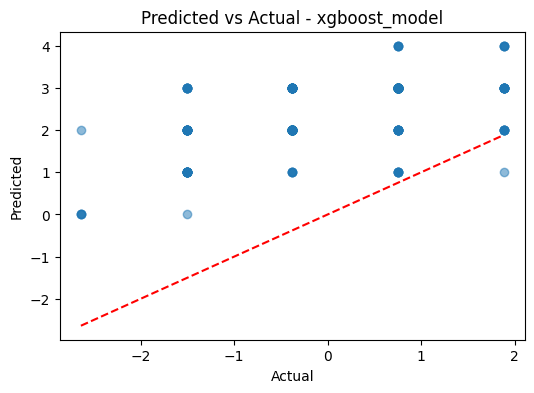

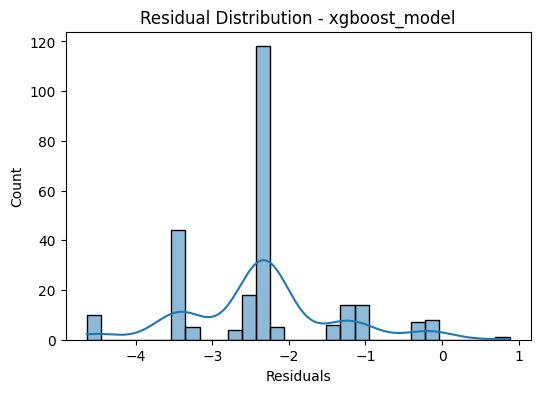

In [39]:
# Predicted vs Actual
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Predicted vs Actual - {name}")
plt.show()
    
# Residual Distribution
residuals = y_test.values.flatten() - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title(f"Residual Distribution - {name}")
plt.xlabel("Residuals")
plt.show()


In [52]:
# Create Results Table & Rank
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE')
print("\nModel Ranking by RMSE (lower is better):")

# Make display nice
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
print(results_df)


Model Ranking by RMSE (lower is better):
                 Model      RMSE       MAE        R2  \
0     best_lasso_model  0.962673  0.765312  0.226578   
7          ridge_model  0.965888  0.762533  0.221404   
5         linear_model  0.966160  0.762663  0.220966   
8            svm_model  1.016102  0.864185  0.138344   
3    gradient_boosting  1.021733  0.871723  0.128767   
4            knn_model  1.023063  0.876543  0.126499   
2    ensemble_pipeline  1.061310  0.902267  0.059967   
6  random_forest_model  2.495949  2.292164 -4.199127   
9        xgboost_model  2.526177  2.347282 -4.325820   
1  decision_tree_model  2.705318  2.414211 -5.107952   

                                                                                                                                                                                                                                                                                                                                                     

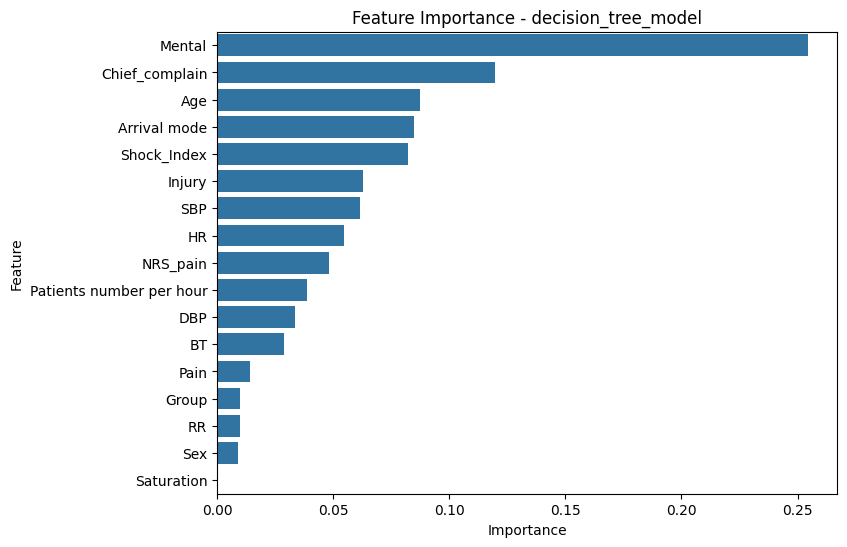

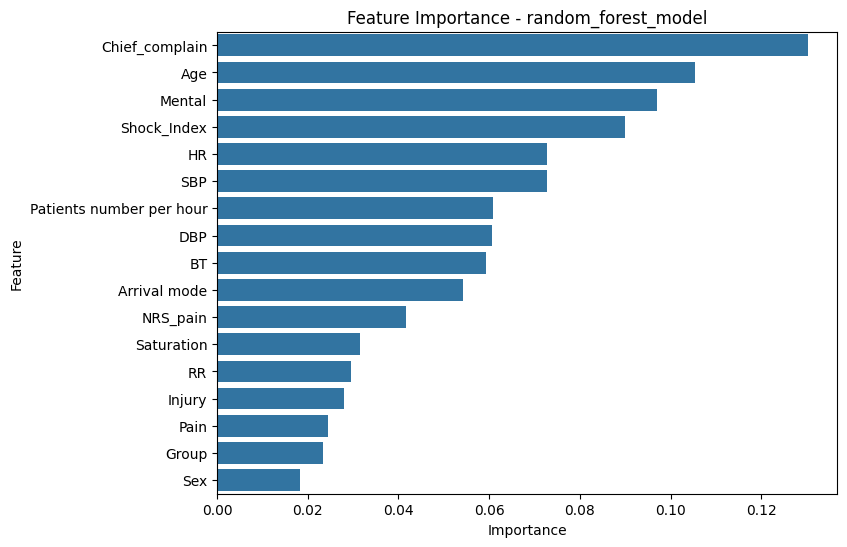

Skipping gradient_boosting (no feature_importances_ available)


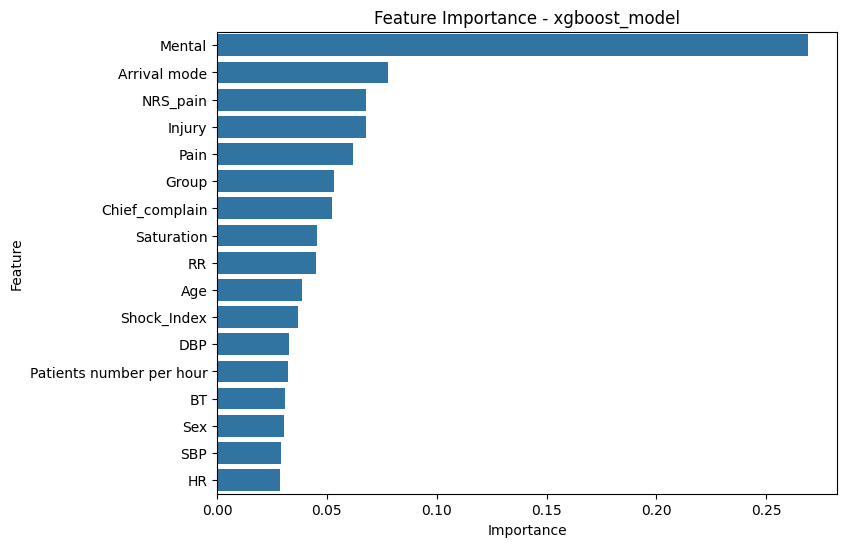

In [41]:
%matplotlib inline
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tree_models = ['decision_tree_model','random_forest_model','gradient_boosting','xgboost_model']

for name in tree_models:
    model = models.get(name)
    if model is None:
        continue
    
    # Unwrap pipeline
    if isinstance(model, Pipeline):
        estimator = model.steps[-1][1]
    else:
        estimator = model
    
    # Get feature importance
    importances = None
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_
    elif hasattr(estimator, 'get_booster'):  # XGBoost fallback
        booster = estimator.get_booster()
        importance_dict = booster.get_score(importance_type='weight')
        importances = np.array([importance_dict.get(f, 0) for f in X_test.columns])
    
    if importances is not None:
        feat_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': importances})
        feat_df = feat_df.sort_values('Importance', ascending=False)
        
        plt.figure(figsize=(8,6))
        sns.barplot(x='Importance', y='Feature', data=feat_df)
        plt.title(f'Feature Importance - {name}')
        plt.show()
    else:
        print(f"Skipping {name} (no feature_importances_ available)")


Loaded best_lasso_model
Loaded decision_tree_model


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to 

Loaded ensemble_pipeline
Loaded gradient_boosting
Loaded knn_model
Loaded linear_model
Loaded random_forest_model
Loaded ridge_model
Loaded svm_model
Loaded xgboost_model

Evaluating best_lasso_model ...


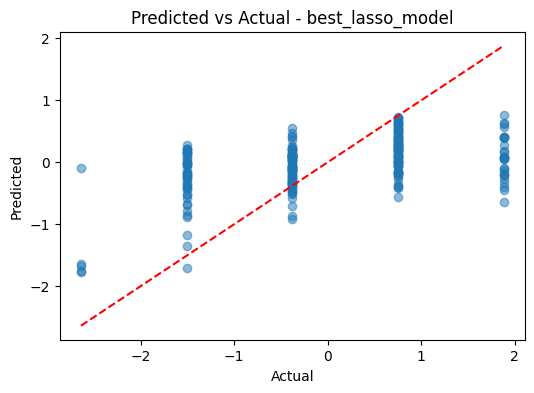

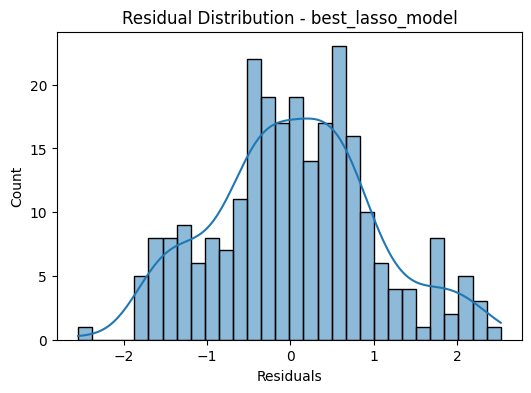


Evaluating decision_tree_model ...


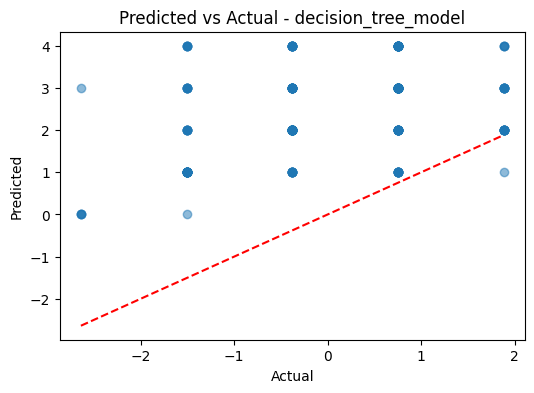

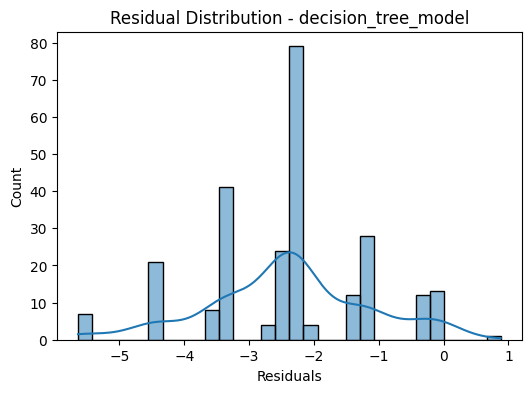


Evaluating ensemble_pipeline ...


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


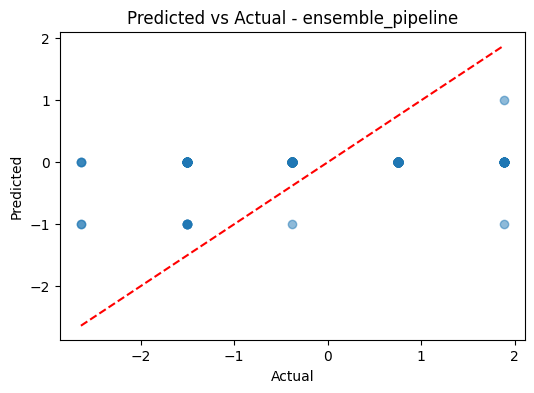

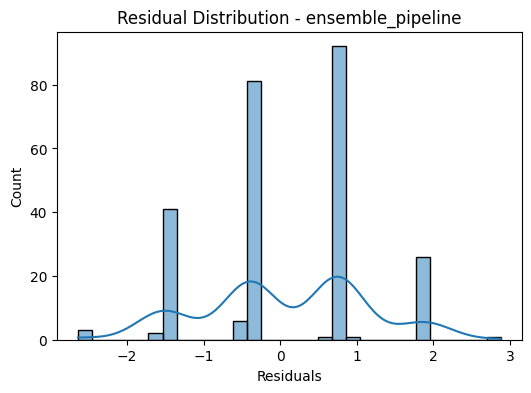


Evaluating gradient_boosting ...


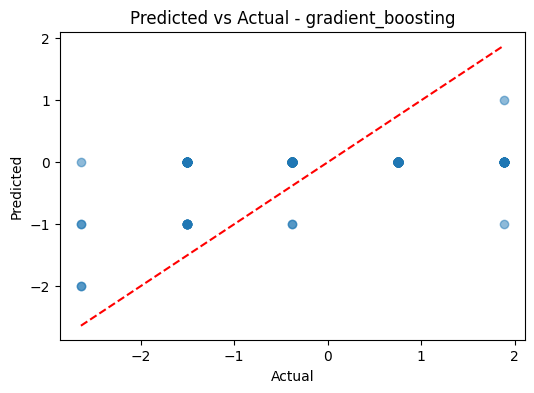

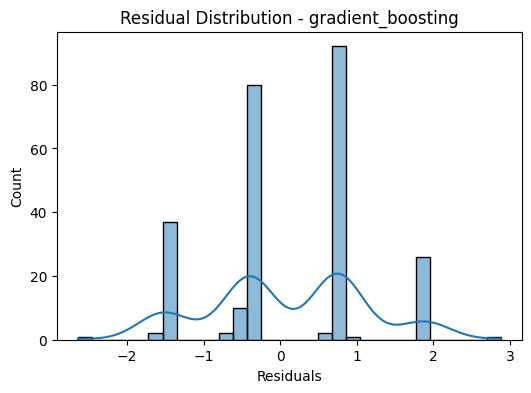


Evaluating knn_model ...


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


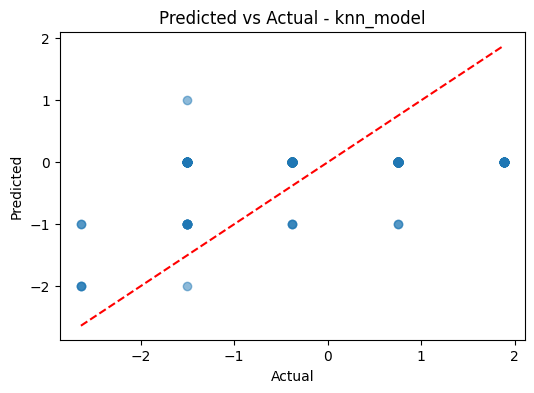

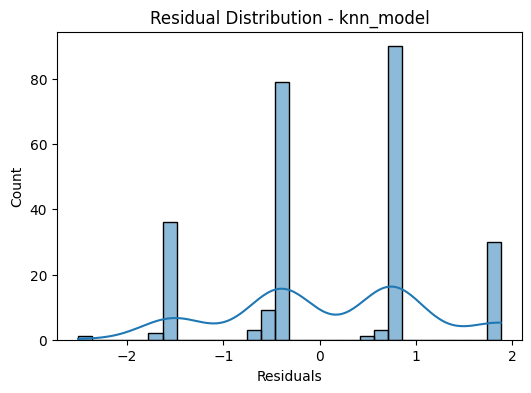


Evaluating linear_model ...


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


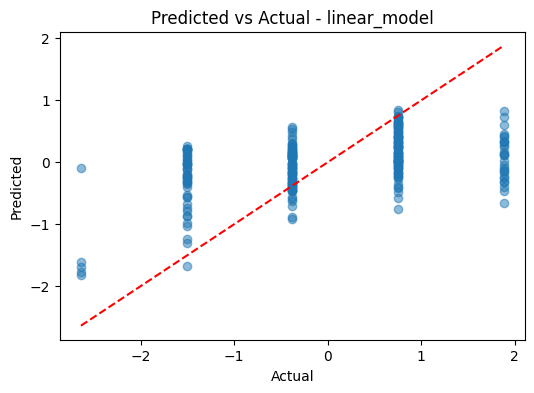

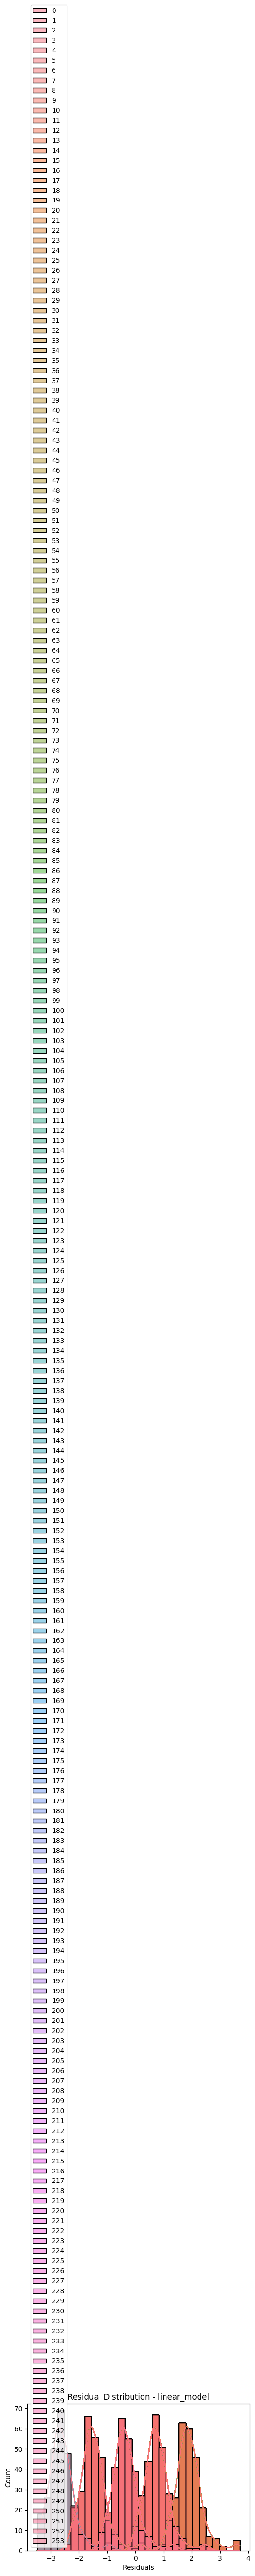


Evaluating random_forest_model ...


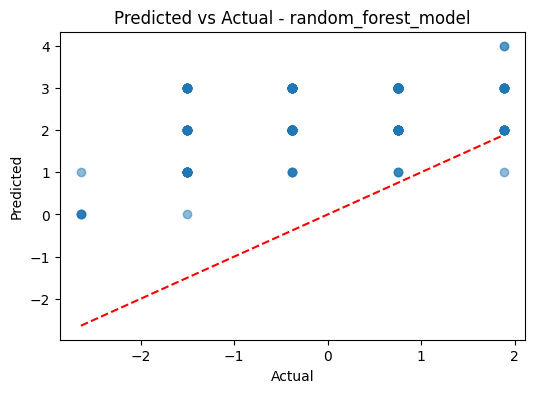

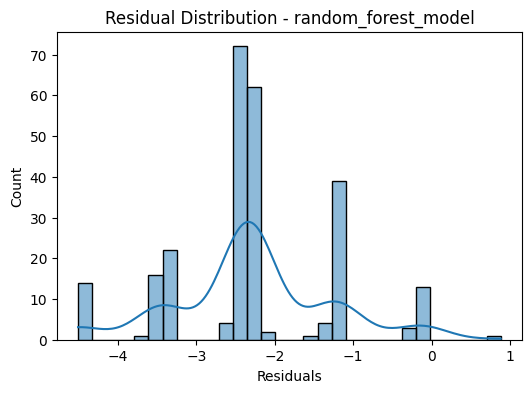


Evaluating ridge_model ...


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


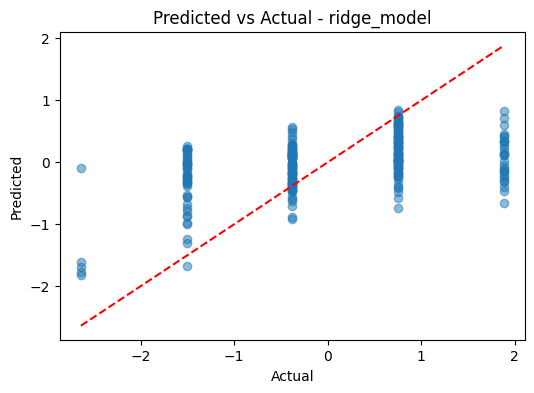

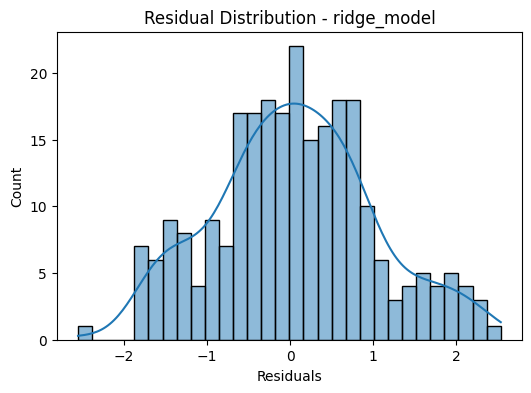


Evaluating svm_model ...


C:\Users\venus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


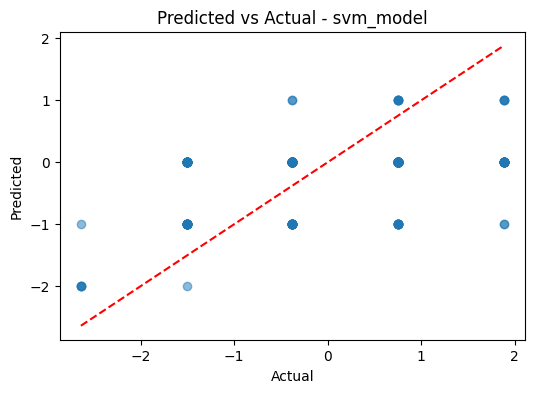

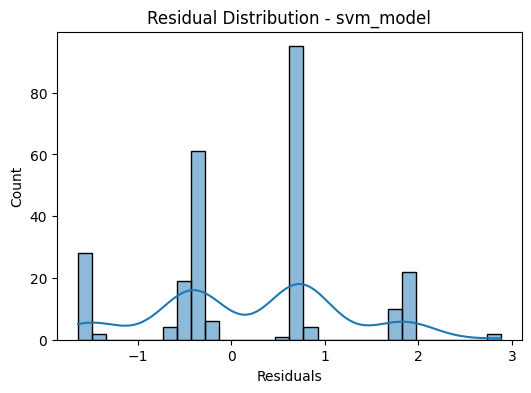


Evaluating xgboost_model ...


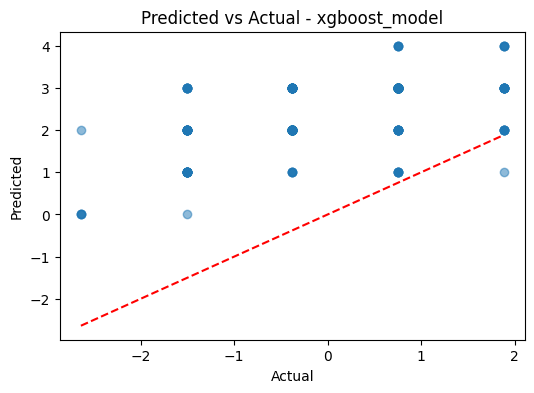

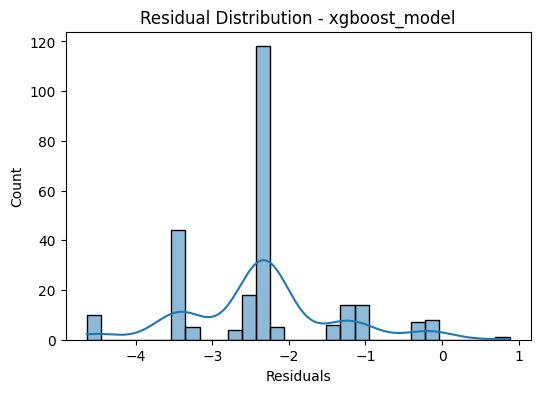

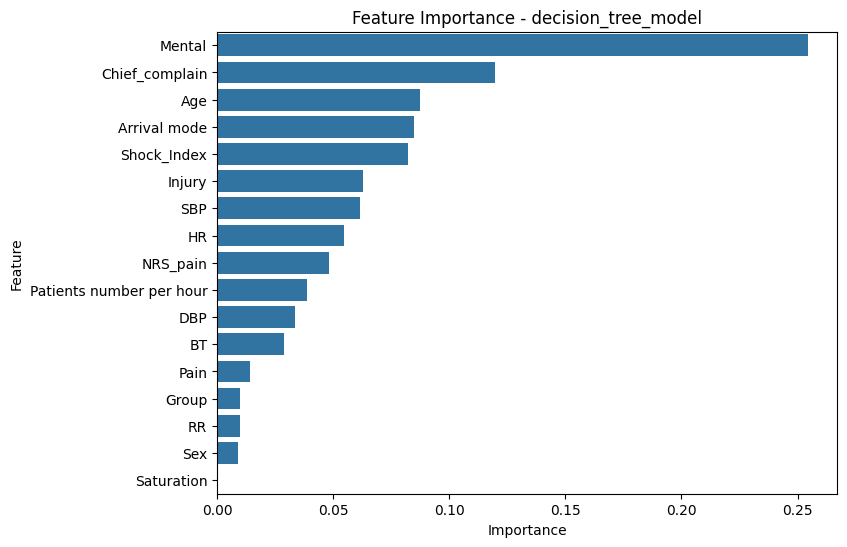

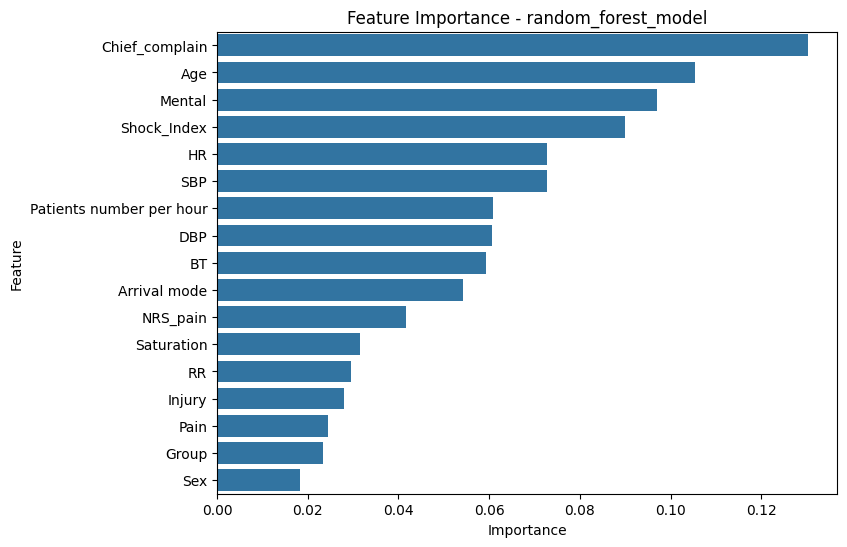

Skipping gradient_boosting (no feature_importances_ available)


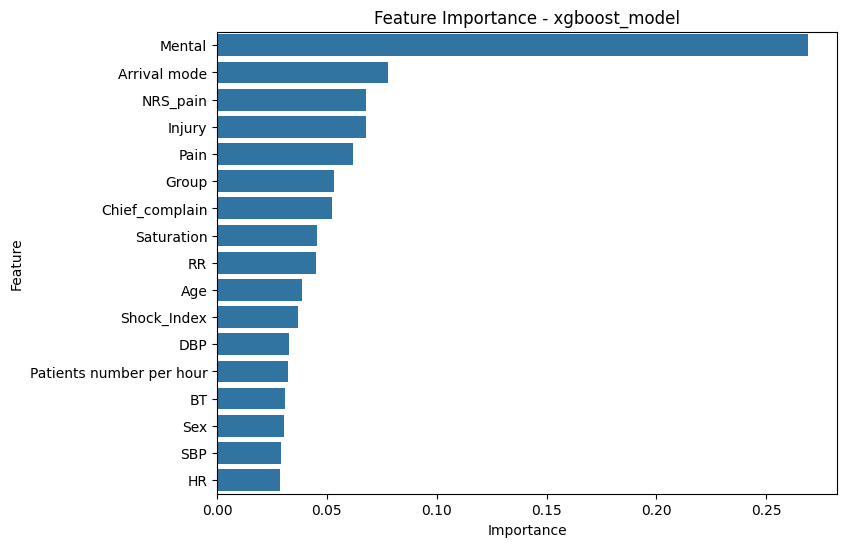

In [44]:
# ===============================
# 0️⃣ Imports
# ===============================
%matplotlib inline
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ===============================
# 1️⃣ Load Test Data
# ===============================
X_test = pd.read_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\Processed data\X_test.csv")
y_test = pd.read_csv(r"C:\Desktop\Maathu\Maathu\CSE\ML\Practicce\BioFusion\Processed data\y_test.csv")

# Make sure y_test is 1D
y_test = y_test.values.flatten()

# ===============================
# 2️⃣ Load Models
# ===============================
model_files = [
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\best_lasso_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\decision_tree_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\ensemble_pipeline.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\gradient_boosting.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\knn_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\linear_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\random_forest_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\ridge_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\svm_model.pkl",
    r"C:\Users\venus\AI-Based-Emergency-Room-Triage-System\models\xgboost_model.pkl"
]

models = {}
for file in model_files:
    try:
        # Key = filename without extension
        key = os.path.splitext(os.path.basename(file))[0]
        models[key] = joblib.load(file)
        print(f"Loaded {key}")
    except FileNotFoundError:
        print(f"WARNING: {file} not found, skipping.")
    except Exception as e:
        print(f"ERROR loading {file}: {e}")

# ===============================
# 3️⃣ Evaluation Function
# ===============================
def evaluate_model(model, X_test, y_test):
    # If model is a pipeline, unwrap the last step for linear models warnings
    if isinstance(model, Pipeline):
        estimator = model.steps[-1][1]
    else:
        estimator = model
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return y_pred, rmse, mae, r2, estimator

# ===============================
# 4️⃣ Evaluate All Models
# ===============================
results = []

for name, model in models.items():
    print(f"\nEvaluating {name} ...")
    try:
        y_pred, rmse, mae, r2, estimator = evaluate_model(model, X_test, y_test)
        results.append({'Model': name, 'RMSE': rmse, 'MAE': mae, 'R2': r2, 'y_pred': y_pred, 'estimator': estimator})
        
        # Plot Predicted vs Actual
        plt.figure(figsize=(6,4))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title(f"Predicted vs Actual - {name}")
        plt.show()
        
        # Residual Distribution
        residuals = y_test - y_pred
        plt.figure(figsize=(6,4))
        sns.histplot(residuals, bins=30, kde=True)
        plt.title(f"Residual Distribution - {name}")
        plt.xlabel("Residuals")
        plt.show()
        
    except Exception as e:
        print(f"ERROR evaluating {name}: {e}")

# ===============================
# 5️⃣ Results Table & Ranking
# ===============================
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='RMSE').reset_index(drop=True)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
results_df_sorted[['Model','RMSE','MAE','R2']]
results_df_sorted
# ===============================
# 6️⃣ Feature Importance for Tree/XGBoost
# ===============================
tree_models = ['decision_tree_model','random_forest_model','gradient_boosting','xgboost_model']

for name in tree_models:
    model = models.get(name)
    if model is None:
        print(f"{name} not found, skipping")
        continue
    
    # unwrap pipeline
    if isinstance(model, Pipeline):
        estimator = model.steps[-1][1]
    else:
        estimator = model
    
    # Get feature importance
    importances = None
    # Standard tree-based feature_importances_
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_
    # XGBoost fallback
    elif hasattr(estimator, 'get_booster'):
        booster = estimator.get_booster()
        importance_dict = booster.get_score(importance_type='weight')
        importances = np.array([importance_dict.get(f, 0) for f in X_test.columns])
    
    if importances is not None:
        feat_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': importances})
        feat_df = feat_df.sort_values('Importance', ascending=False)
        
        plt.figure(figsize=(8,6))
        sns.barplot(x='Importance', y='Feature', data=feat_df)
        plt.title(f'Feature Importance - {name}')
        plt.show()
    else:
        print(f"Skipping {name} (no feature_importances_ available)")
